In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import PredictionErrorDisplay, median_absolute_error
from sklearn.model_selection import RepeatedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd

In [2]:
#p_karst_with_controls = gpd.read_file('p_karst_controls_and_slope_5070.shp')
#p_karst_with_controls = gpd.read_file("p_karst_with_controls_5070.shp")
p_karst_with_controls = gpd.read_file('temp_p_karst_with_controls_5070.shp')
p_karst_with_controls.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 29068 entries, 0 to 29067
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    29068 non-null  float64 
 1   tnmid       29068 non-null  object  
 2   metasource  11319 non-null  object  
 3   sourcedata  655 non-null    object  
 4   sourceorig  675 non-null    object  
 5   sourcefeat  0 non-null      object  
 6   loaddate    29011 non-null  object  
 7   referenceg  174 non-null    object  
 8   areaacres   29068 non-null  float64 
 9   areasqkm    29068 non-null  float64 
 10  states      29068 non-null  object  
 11  huc12       29068 non-null  object  
 12  name        29068 non-null  object  
 13  hutype      29068 non-null  object  
 14  humod       29060 non-null  object  
 15  tohuc       29068 non-null  object  
 16  noncontrib  27978 non-null  float64 
 17  noncontr_1  27898 non-null  float64 
 18  globalid    29068 non-null  object  
 

In [3]:
p_karst_with_controls_nonzero = p_karst_with_controls[p_karst_with_controls.p_karst>0]
p_karst_with_controls_nonzero.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 5511 entries, 11 to 29050
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    5511 non-null   float64 
 1   tnmid       5511 non-null   object  
 2   metasource  2151 non-null   object  
 3   sourcedata  119 non-null    object  
 4   sourceorig  118 non-null    object  
 5   sourcefeat  0 non-null      object  
 6   loaddate    5511 non-null   object  
 7   referenceg  8 non-null      object  
 8   areaacres   5511 non-null   float64 
 9   areasqkm    5511 non-null   float64 
 10  states      5511 non-null   object  
 11  huc12       5511 non-null   object  
 12  name        5511 non-null   object  
 13  hutype      5511 non-null   object  
 14  humod       5510 non-null   object  
 15  tohuc       5511 non-null   object  
 16  noncontrib  5153 non-null   float64 
 17  noncontr_1  5149 non-null   float64 
 18  globalid    5511 non-null   object  
 19  s

In [4]:
p_karst_with_controls_nonzero.keys()

Index(['objectid', 'tnmid', 'metasource', 'sourcedata', 'sourceorig',
       'sourcefeat', 'loaddate', 'referenceg', 'areaacres', 'areasqkm',
       'states', 'huc12', 'name', 'hutype', 'humod', 'tohuc', 'noncontrib',
       'noncontr_1', 'globalid', 'shape_Leng', 'shape_Area', 'p_karst',
       'mean annua', 'mean diurn', 'isothermal', 'annual pre', 'precipitat',
       'net primar', 'monthly me', 'cmi mean', 'carbonate', 'clay', 'density',
       'ksat', 'organic ma', 'ph', 'depth res', 'rock fragm', 'sand', 'silt',
       'depth', 'water stor', 'huc_carb_i', 'huc_pct_ar', 'geometry'],
      dtype='object')

In [9]:
p_karst_with_controls_nonzero[p_karst_with_controls_nonzero.huc_pct_ar<.5]

objectid                                   tnmid  \
291      1670.0  {BFFB1C7A-08D0-45D7-B482-40C246544DE3}   
302      1709.0  {1E276068-5FEA-49A0-8E15-0133CA8F0E11}   
1007     4966.0  {1FFE62F5-8760-467E-AA70-A38CA1AED435}   
2048     7967.0  {31910C66-4AAC-4497-AA1C-6B2A6D3FC366}   
2049     7968.0  {99DCECBF-733E-458B-B0BC-5DD418B349E4}   
...         ...                                     ...   
27383   95170.0  {1E075661-073B-4D1F-B90C-5BFA05C5F2FE}   
27409   95202.0  {996DD34A-51E7-4DF1-9FFF-734AE420BA8F}   
27424   95228.0  {1E091EC0-9B86-4FE0-A2EB-4BBE144660B9}   
27427   95232.0  {4891C00B-3D2C-44A8-89A6-3037BFA89F53}   
28910  101373.0  {1A21F21E-5F6D-47AB-B622-2580D64A0304}   

                                   metasource sourcedata sourceorig  \
291    {024B4F9C-B85D-47B5-88B1-497C15F07760}       None       None   
302    {024B4F9C-B85D-47B5-88B1-497C15F07760}       None       None   
1007                                     None       None       None   
2048                                     None       None       None   
2049                                     None       None       None   
...                                       ...        ...        ...   
27383                                    None       None       None   
27409                                    None       None       None   
27424                                    None       None       None   
27427                                    None       None       None   
28910  {232A85F8-D83C-49A9-B467-1946972846F9}       None       None   

      sourcefeat                 loaddate referenceg  areaacres  areasqkm  \
291         None  2013/01/18 07:07:57.000       None   21261.37     86.04   
302         None  2013/01/18 07:07:57.000       None   23828.37     96.43   
1007        None  2013/01/18 07:07:57.000       None   22877.30     92.58   
2048        None  2013/01/18 07:08:14.000       None   11374.74     46.03   
2049        None  2013/01/18 07:08:14.000       None   34729.28    140.54   
...          ...                      ...        ...        ...       ...   
27383       None  2013/01/18 07:09:02.000       None   39889.86    161.43   
27409       None  2013/01/18 07:08:57.000       None   11073.95     44.81   
27424       None  2013/01/18 07:08:57.000       None    4271.24     17.29   
27427       None  2013/01/18 07:08:57.000       None   10910.88     44.15   
28910       None  2020/10/22 11:00:18.000       None   32076.18    129.81   

       ...        ph   depth res rock fragm       sand       silt       depth  \
291    ...  5.523103   82.433579   0.118716  28.458048  36.559431  119.604351   
302    ...  5.436270  106.811020   0.108573  21.732726  39.958802  137.514507   
1007   ...  5.174234   56.299020   0.249502  34.033671  37.207413  135.694032   
2048   ...  6.365753   73.385999   0.005479   9.576973  64.936028  154.479687   
2049   ...  6.313057   70.606453   0.004261  10.135788  64.233429  150.364481   
...    ...       ...         ...        ...        ...        ...         ...   
27383  ...  7.526949   42.522709   0.146948  31.432759  33.295732   55.044169   
27409  ...  5.203769   48.152014   0.134821  28.725035  33.903864  157.045043   
27424  ...  5.226622   58.962023   0.121275  29.249592  33.394587  155.679843   
27427  ...  5.216051   42.026457   0.099383  27.819452  33.267572  159.886828   
28910  ...  6.182626   55.128083   0.163058  46.625869  40.310339   97.247263   

       water stor  huc_carb_i huc_pct_ar  \
291     16.129464    1.000000   0.453200   
302     18.713193    1.000000   0.174207   
1007    16.078445    0.874176   0.426928   
2048    29.725584    0.617594   0.433629   
2049    28.946978    0.625387   0.456913   
...           ...         ...        ...   
27383    7.100992    0.671557   0.498443   
27409   23.829618    1.000000   0.419457   
27424   24.283161    0.821969   0.346592   
27427   24.806429    1.000000   0.472327   
28910   15.510169    0.000000   0.497497   

                  

In [27]:
common_rocks = ['limestone', 'dolostone (dolomite)', 'shale', 'sandstone']
p_karst_with_controls_nonzero = p_karst_with_controls_nonzero[p_karst_with_controls_nonzero.rocktype1.isin(common_rocks)]
p_karst_with_controls_nonzero.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 3322 entries, 15 to 29050
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    3322 non-null   float64 
 1   tnmid       3322 non-null   object  
 2   metasource  1304 non-null   object  
 3   sourcedata  86 non-null     object  
 4   sourceorig  84 non-null     object  
 5   sourcefeat  0 non-null      object  
 6   loaddate    3322 non-null   object  
 7   referenceg  5 non-null      object  
 8   areaacres   3322 non-null   float64 
 9   areasqkm    3322 non-null   float64 
 10  states      3322 non-null   object  
 11  huc12       3322 non-null   object  
 12  name        3322 non-null   object  
 13  hutype      3322 non-null   object  
 14  humod       3321 non-null   object  
 15  tohuc       3322 non-null   object  
 16  noncontrib  3159 non-null   float64 
 17  noncontr_1  3156 non-null   float64 
 18  globalid    3322 non-null   object  
 19  s

In [10]:
p_karst_with_controls_nonzero.rocktype1.unique()

AttributeError: 'GeoDataFrame' object has no attribute 'rocktype1'

In [11]:
p_karst_with_controls_nonzero.keys()

Index(['objectid', 'tnmid', 'metasource', 'sourcedata', 'sourceorig',
       'sourcefeat', 'loaddate', 'referenceg', 'areaacres', 'areasqkm',
       'states', 'huc12', 'name', 'hutype', 'humod', 'tohuc', 'noncontrib',
       'noncontr_1', 'globalid', 'shape_Leng', 'shape_Area', 'p_karst',
       'mean annua', 'mean diurn', 'isothermal', 'annual pre', 'precipitat',
       'net primar', 'monthly me', 'cmi mean', 'carbonate', 'clay', 'density',
       'ksat', 'organic ma', 'ph', 'depth res', 'rock fragm', 'sand', 'silt',
       'depth', 'water stor', 'huc_carb_i', 'huc_pct_ar', 'geometry'],
      dtype='object')

Select factors and prediction variable and create categories

In [223]:
"""XY = p_karst_with_controls_nonzero.loc[:,['exposure', 'induration', 'rocktype1',
       'mean annua', 'mean diurn',
       'isothermal', 'annual pre',
       'precipitat', 'net primar',
       'monthly me', 'cmi mean', 'carbonate', 'clay', 'density', 'ksat',
       'organic ma', 'ph', 'depth res', 'rock fragm', 'sand', 'silt',
       'depth', 'water stor', 'p_karst', 'median_slo']].copy()
"""
XY = p_karst_with_controls_nonzero.loc[:,['huc_carb_i',
       'mean annua', 'mean diurn',
       'isothermal', 'annual pre',
       'precipitat', 'net primar',
       'monthly me', 'cmi mean', 'carbonate', 'clay', 'density', 'ksat',
       'organic ma', 'ph', 'depth res', 'rock fragm', 'sand', 'silt',
       'depth', 'water stor', 'p_karst']].copy()
XY.dropna(inplace=True)

X = XY.loc[:,['huc_carb_i',
       'mean annua', 'mean diurn',
       'isothermal', 'annual pre',
       'precipitat', 'net primar',
       'monthly me', 'cmi mean', 'carbonate', 'clay', 'density', 'ksat',
       'organic ma', 'ph', 'depth res', 'rock fragm', 'sand', 'silt',
       'depth', 'water stor',]]
Y = XY.p_karst
#X['rocktype1'] = X['rocktype1'].astype('category')
#X['exposure'] = X['exposure'].astype('category')
#X['induration'] = X['induration'].astype('category')

#log transform slope
#X['log_slope'] = np.log10(X['median_slo'])
X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5351 entries, 11 to 29050
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   huc_carb_i  5351 non-null   float64
 1   mean annua  5351 non-null   float64
 2   mean diurn  5351 non-null   float64
 3   isothermal  5351 non-null   float64
 4   annual pre  5351 non-null   float64
 5   precipitat  5351 non-null   float64
 6   net primar  5351 non-null   float64
 7   monthly me  5351 non-null   float64
 8   cmi mean    5351 non-null   float64
 9   carbonate   5351 non-null   float64
 10  clay        5351 non-null   float64
 11  density     5351 non-null   float64
 12  ksat        5351 non-null   float64
 13  organic ma  5351 non-null   float64
 14  ph          5351 non-null   float64
 15  depth res   5351 non-null   float64
 16  rock fragm  5351 non-null   float64
 17  sand        5351 non-null   float64
 18  silt        5351 non-null   float64
 19  depth       5351 non-null   fl

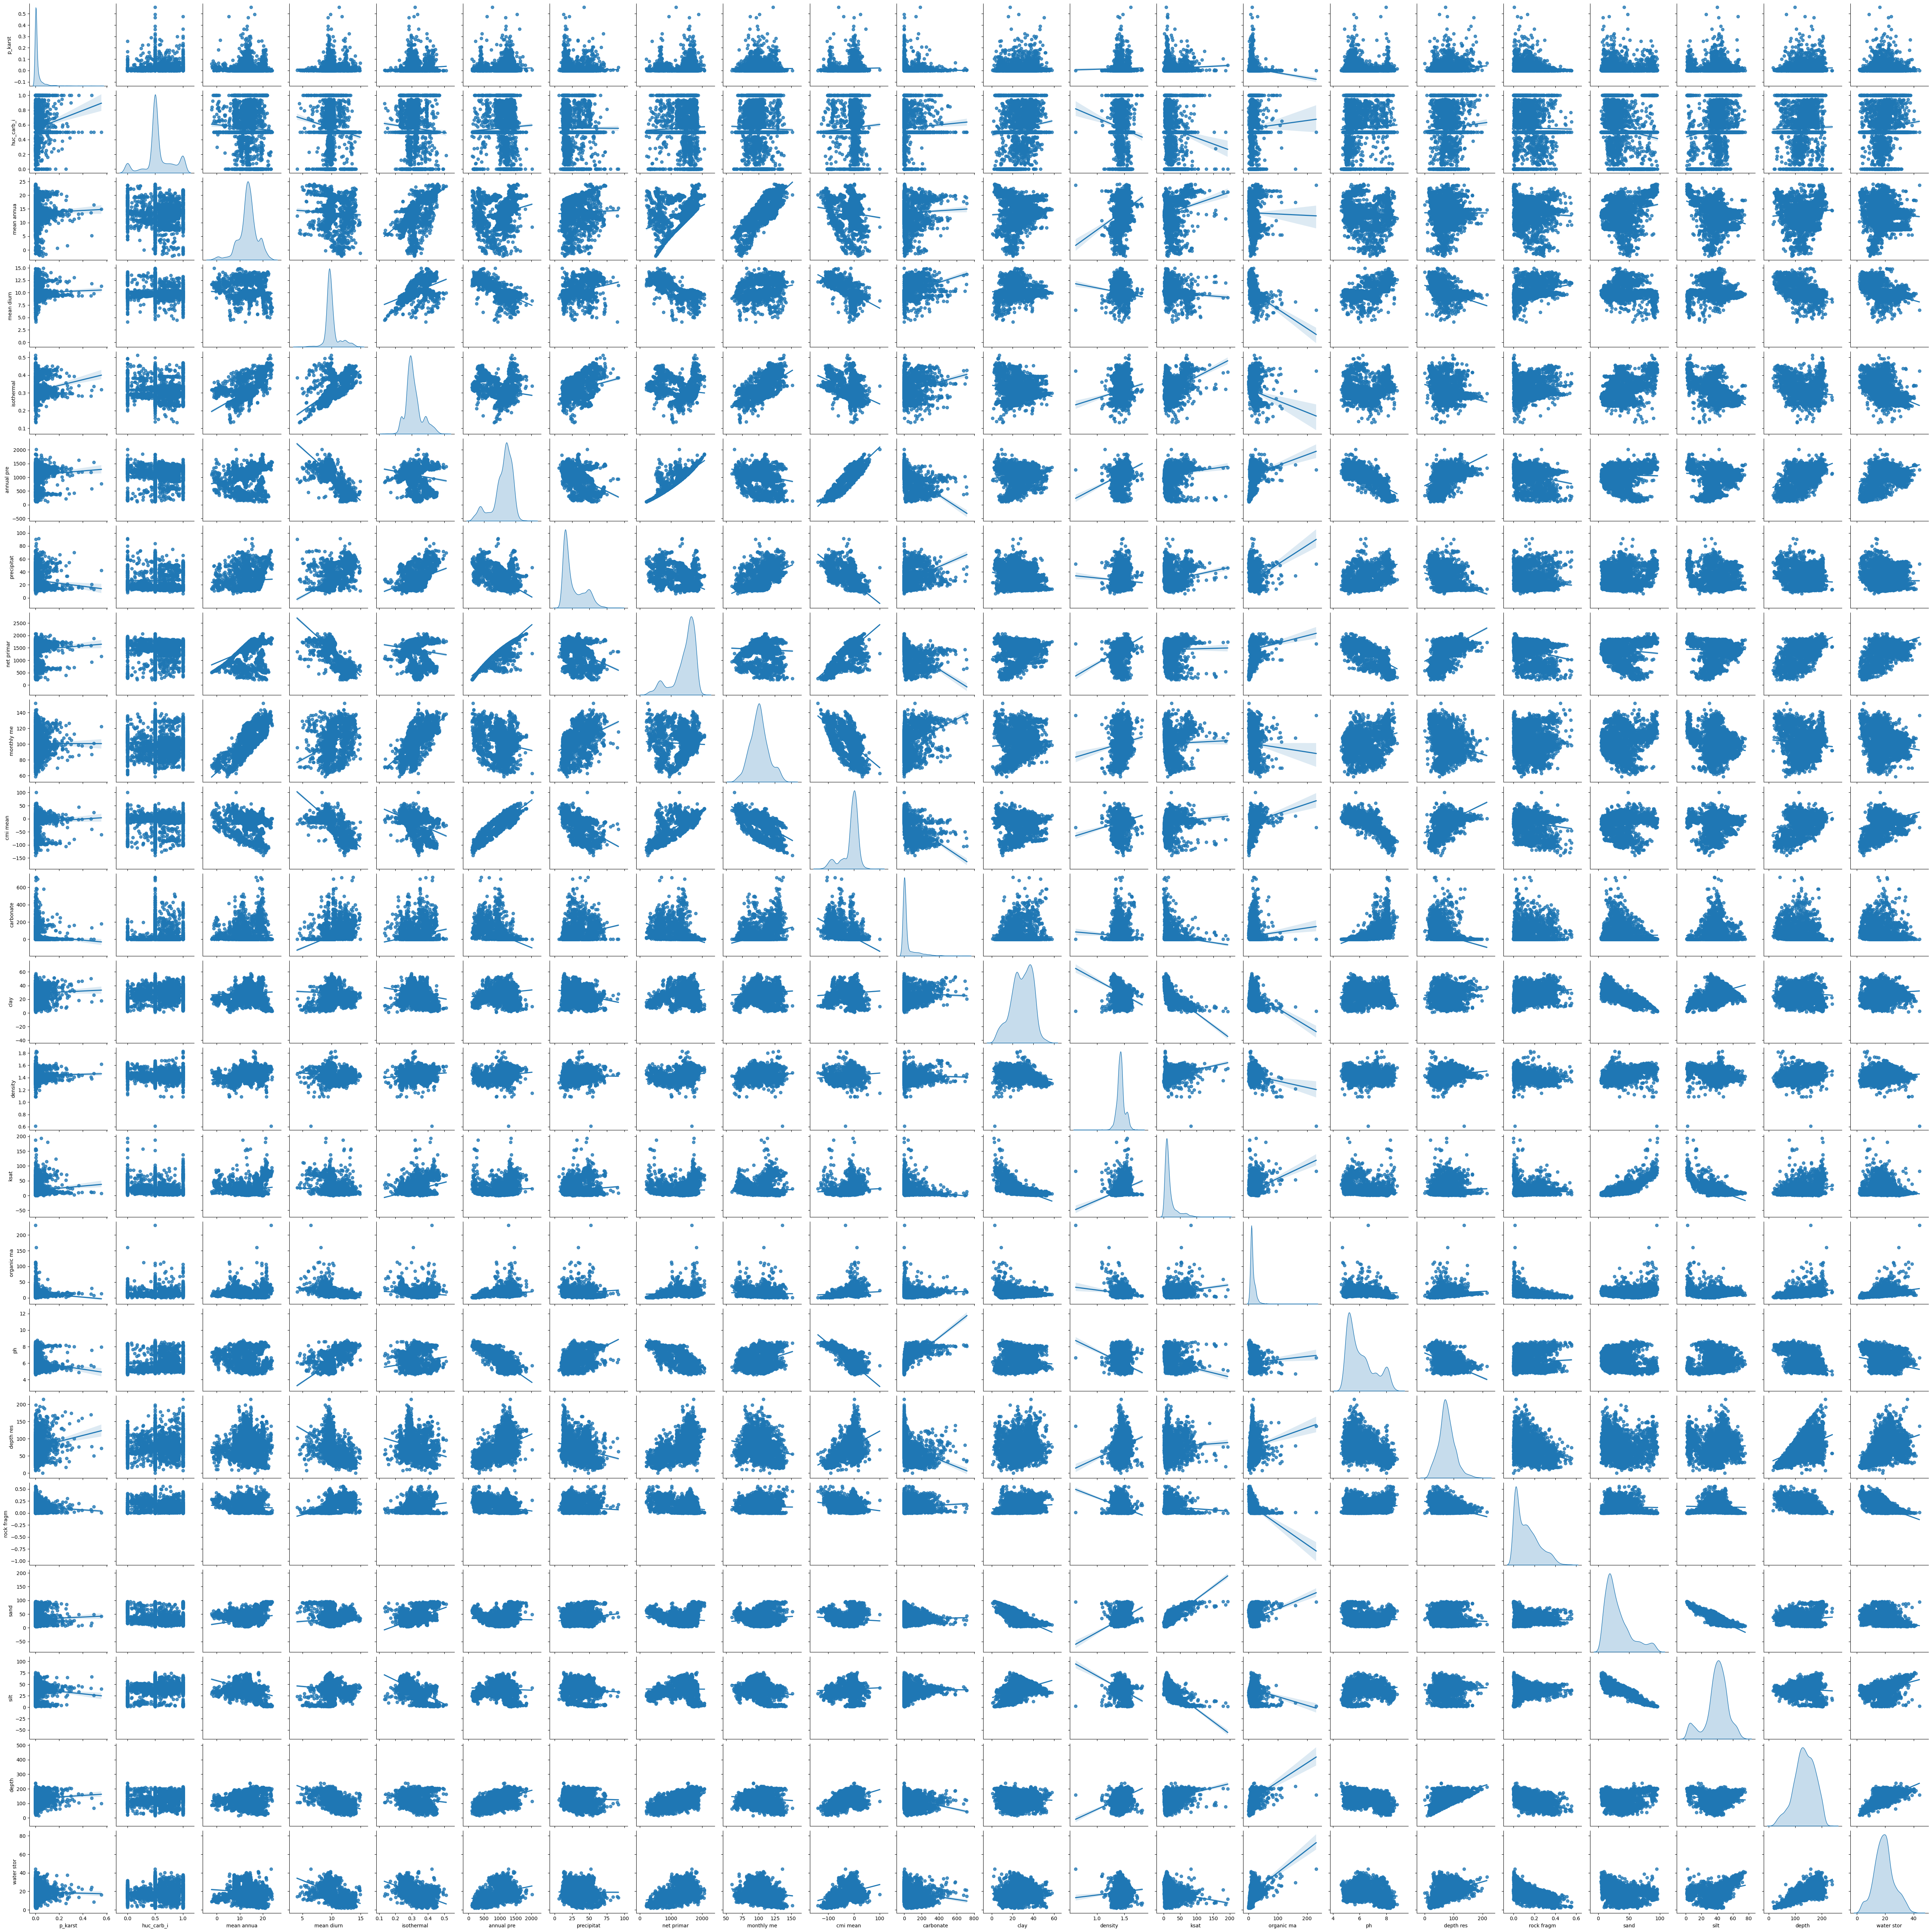

In [31]:
train_dataset = X_train.copy()
train_dataset.insert(0,"p_karst", y_train)
_ = sns.pairplot(train_dataset, kind="reg", diag_kind="kde")

In [217]:
#categorical_columns = ["exposure", "rocktype1", "induration"]
#categorical_columns = ["exposure", "rocktype1", ]
categorical_columns = []

"""
numerical_columns = ['mean annua', 'mean diurn',
       'isothermal', 'annual pre', 'precipitat', 'net primar', 'monthly me',
       'cmi mean', 'carbonate', 'clay', 'density', 'ksat', 'organic ma', 'ph',
       'depth res', 'rock fragm', 'sand', 'silt', 'depth', 'water stor']
"""

numerical_columns = ['mean annua', 'annual pre', 'precipitat',  
              'silt', 'clay', 'huc_carb_i']

preprocessor = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), categorical_columns),
    (StandardScaler(), numerical_columns),
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names
)
alphas = np.logspace(-10, 10, 21)  # alpha values to be chosen from by cross-validation

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=RidgeCV(alphas=alphas), func=np.log10, inverse_func=sp.special.exp10
    ),
)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  []),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['mean annua', 'annual pre',
                                                   'precipitat', 'silt', 'clay',
                                                   'huc_carb_i'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=RidgeCV(alphas=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]))))])

In [218]:
model[-1].regressor_.alpha_

100.0

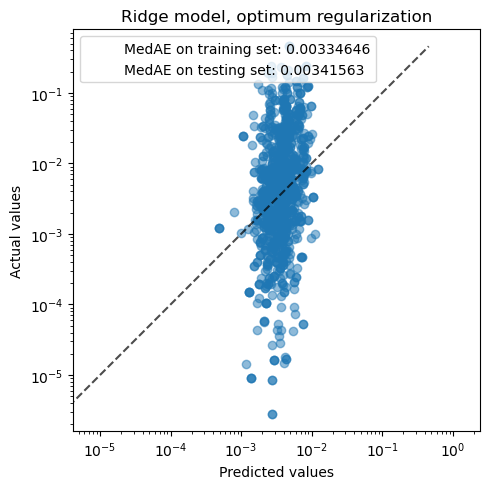

In [278]:
mae_train = median_absolute_error(y_train, model.predict(X_train))
y_pred = model.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)
scores = {
    "MedAE on training set": f"{mae_train:.8f}",
    "MedAE on testing set": f"{mae_test:.8f} ",
}

_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5},
)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Ridge model, optimum regularization")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

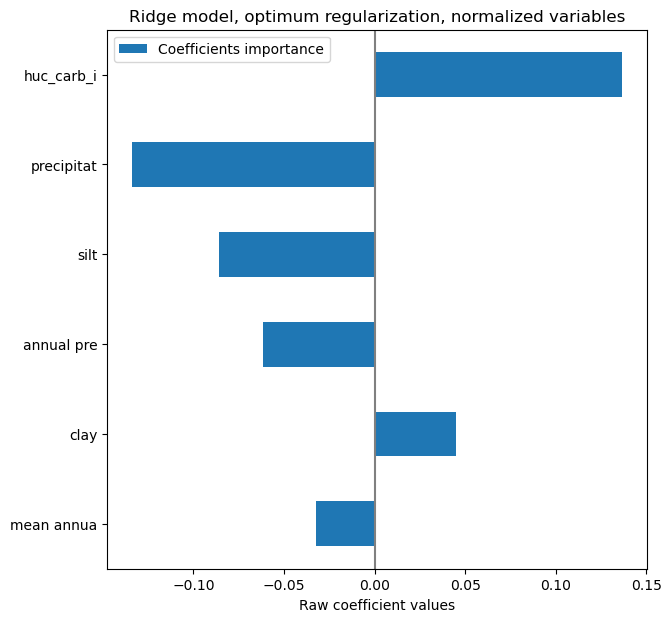

In [9]:
feature_names = model[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients importance"],
    index=feature_names,
)
coefs.sort_values(by='Coefficients importance', key=np.abs, inplace=True)
coefs.plot.barh(figsize=(9, 7))
plt.title("Ridge model, optimum regularization, normalized variables")
plt.xlabel("Raw coefficient values")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [10]:
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)

cv_model = cross_validate(
    model,
    X,
    Y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)
coefs = pd.DataFrame(
    [est[-1].regressor_.coef_ for est in cv_model["estimator"]], columns=feature_names
)

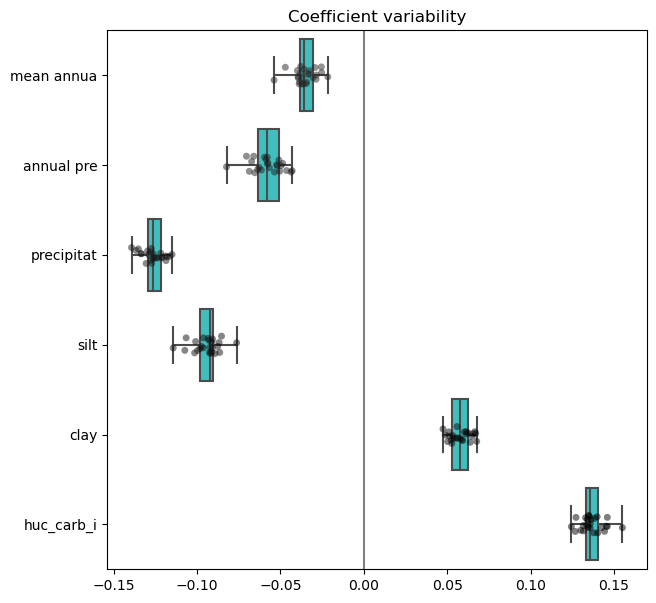

In [11]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", palette="dark:k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=10)
plt.axvline(x=0, color=".5")
plt.title("Coefficient variability")
plt.subplots_adjust(left=0.3)

In [12]:
alphas = np.logspace(-10, 10, 21)  # alpha values to be chosen from by cross-validation
model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=LassoCV(alphas=alphas, max_iter=100_000),
        func=np.log10,
        inverse_func=sp.special.exp10,
    ),
)

_ = model.fit(X_train, y_train)

In [13]:
model[-1].regressor_.alpha_

0.0001

In [215]:
mae_train = median_absolute_error(y_train, model.predict(X_train))
y_pred = model.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)
scores = {
    "MedAE on training set": f"{mae_train:.5f}",
    "MedAE on testing set": f"{mae_test:.5f}",
}

_, ax = plt.subplots(figsize=(6, 6))
display = PredictionErrorDisplay.from_predictions(
    y_test, 10**y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Lasso model, optimum regularization")
ax.set_xscale('log')
ax.set_yscale('log')
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- carbonate
- cmi mean
- density
- depth
- depth res
- ...


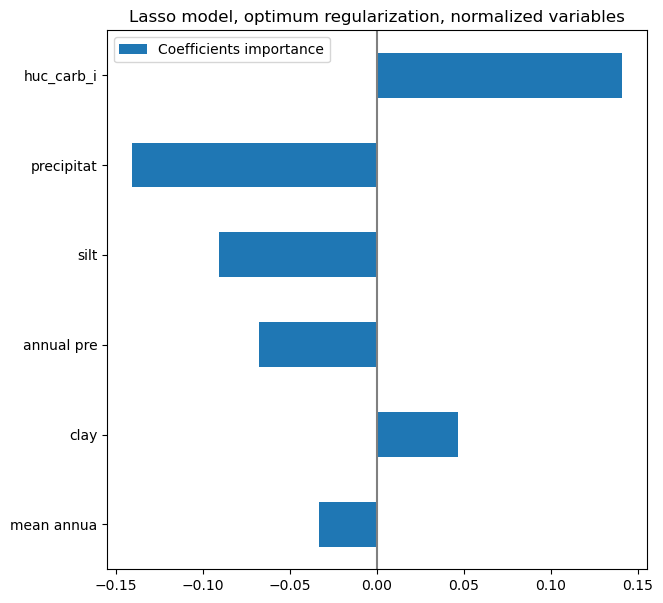

In [15]:
coefs = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients importance"],
    index=feature_names,
)
coefs.sort_values(by='Coefficients importance', key=np.abs, inplace=True)
coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Lasso model, optimum regularization, normalized variables")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

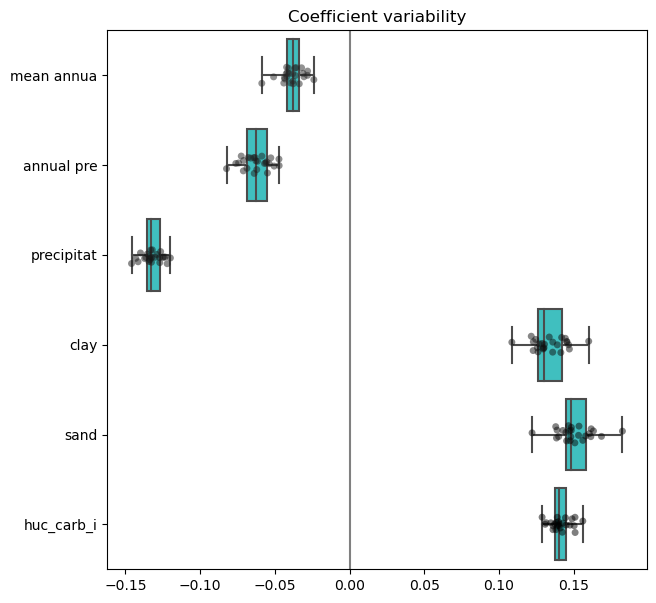

In [24]:
cv_model = cross_validate(
    model,
    X,
    Y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)
coefs = pd.DataFrame(
    [est[-1].regressor_.coef_ for est in cv_model["estimator"]], columns=feature_names
)
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", palette="dark:k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=100)
plt.axvline(x=0, color=".5")
plt.title("Coefficient variability")
plt.subplots_adjust(left=0.3)

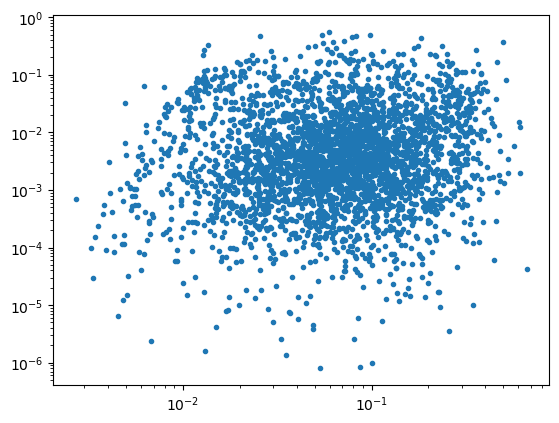

In [46]:
plt.loglog(X['median_slo'], Y, '.')

Text(0, 0.5, 'Silt')

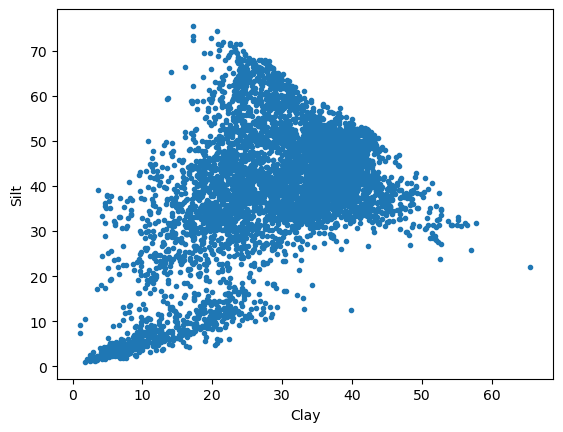

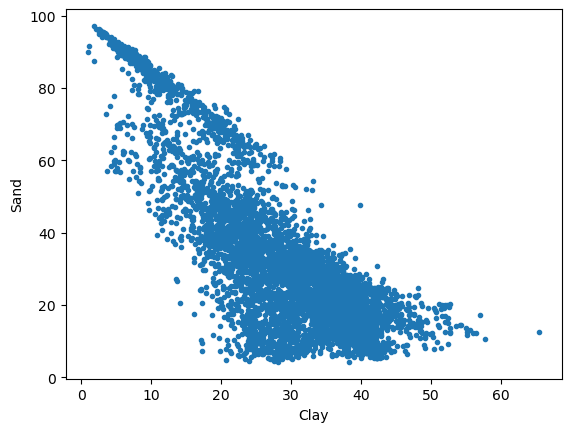

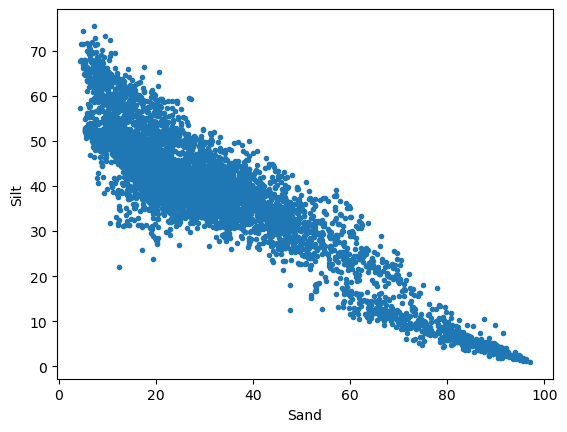

In [34]:
plt.plot(X.clay, X.silt, '.')
plt.xlabel('Clay')
plt.ylabel('Silt')
plt.figure()
plt.plot(X.clay, X.sand, '.')
plt.xlabel('Clay')
plt.ylabel('Sand')
plt.figure()
plt.plot(X.sand, X.silt, '.')
plt.xlabel('Sand')
plt.ylabel('Silt')

Text(-1.9518696424696156, 0.5, 'p_karst')

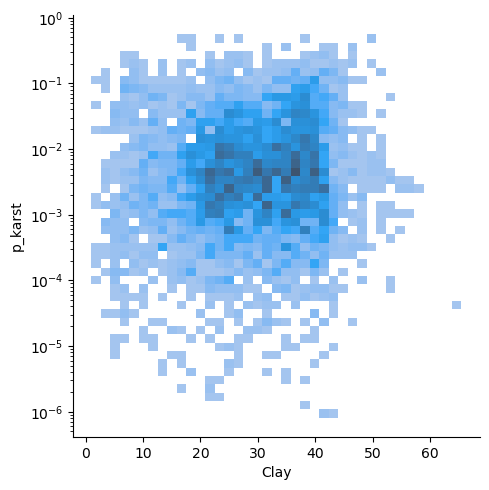

<Figure size 640x480 with 0 Axes>

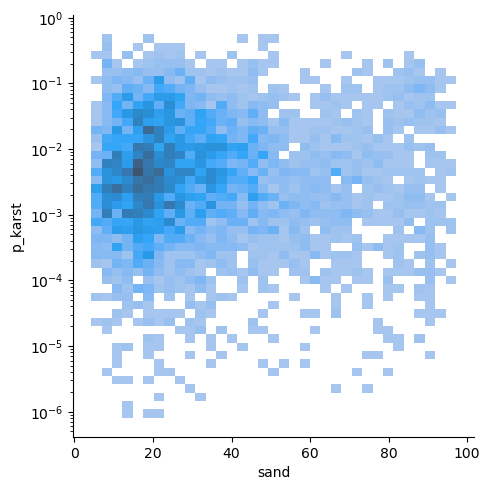

<Figure size 640x480 with 0 Axes>

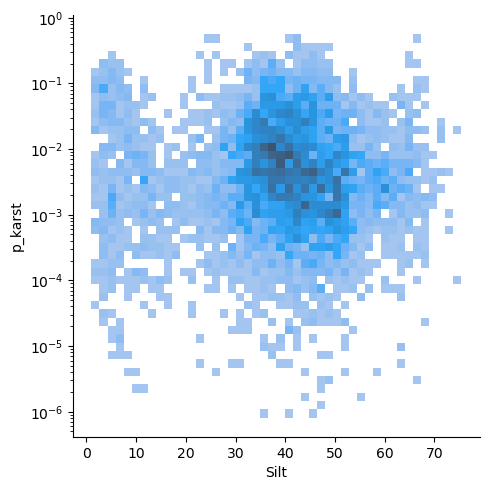

In [43]:
import seaborn as sns
#plt.semilogy(X.clay, Y, '.')
sns.displot(x=X.clay, y=Y, log_scale=(False, True))
plt.xlabel('Clay')
plt.ylabel('p_karst')
plt.figure()
sns.displot(x=X.sand, y=Y, log_scale=(False, True))
#plt.semilogy(X.sand, Y, '.')
plt.xlabel('sand')
plt.ylabel('p_karst')
plt.figure()
#plt.semilogy(X.silt, Y, '.')
sns.displot(x=X.silt, y=Y, log_scale=(False, True))

plt.xlabel('Silt')
plt.ylabel('p_karst')

Text(0, 0.5, 'p_karst')

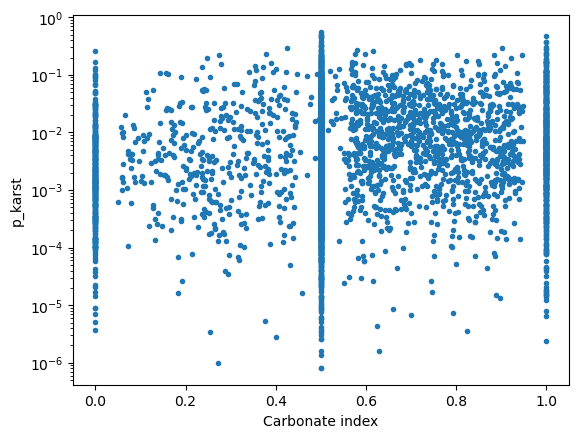

In [38]:
plt.semilogy(X.huc_carb_i, Y, '.')
plt.xlabel('Carbonate index')
plt.ylabel('p_karst')

In [25]:
frac_error = model.predict(X)/Y
frac_error

11        0.617633
12        0.502567
13        3.307725
15       38.740883
27        0.992030
           ...    
29045     0.020609
29047     0.131598
29048     0.027251
29049     1.169183
29050     0.053653
Name: p_karst, Length: 5351, dtype: float64

(array([  48.,  373.,  986., 1589., 1342.,  663.,  235.,   69.,   35.,
          11.]),
 array([-2.36126466, -1.75641205, -1.15155944, -0.54670682,  0.05814579,
         0.6629984 ,  1.26785101,  1.87270362,  2.47755623,  3.08240884,
         3.68726145]),
 <BarContainer object of 10 artists>)

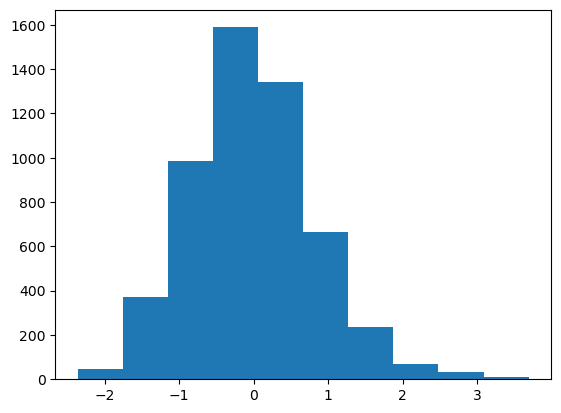

In [19]:
plt.hist(np.log10(frac_error))

In [28]:
error_locations = pd.concat([frac_error, p_karst_with_controls_nonzero.geometry], axis=1)

In [31]:
error_locations = gpd.GeoDataFrame(error_locations)

In [33]:
error_locations.dropna(inplace=True)
error_locations

p_karst                                           geometry
11      0.617633  POLYGON ((308298.974 2383929.132, 308461.797 2...
12      0.502567  POLYGON ((285203.331 2338570.667, 285286.271 2...
13      3.307725  POLYGON ((267777.249 2361445.385, 267850.320 2...
15     38.740883  POLYGON ((285395.822 2379237.606, 285590.214 2...
27      0.992030  POLYGON ((389617.827 2325854.704, 389618.883 2...
...          ...                                                ...
29045   0.020609  MULTIPOLYGON (((1322485.957 721578.270, 132255...
29047   0.131598  POLYGON ((1318955.783 827929.845, 1318849.016 ...
29048   0.027251  POLYGON ((1343343.918 801905.651, 1343359.847 ...
29049   1.169183  POLYGON ((1343084.741 811291.328, 1343068.471 ...
29050   0.053653  MULTIPOLYGON (((1352259.863 803885.263, 135229...

[5351 rows x 2 columns]

In [35]:
error_locations.to_file('error_locations.shp')

In [36]:
!pip install git+https://github.com/lanl/pyBASS.git

  Cloning https://github.com/lanl/pyBASS.git to /tmp/pip-req-build-q9fc3fy6
  Running command git clone --filter=blob:none --quiet https://github.com/lanl/pyBASS.git /tmp/pip-req-build-q9fc3fy6
  Resolved https://github.com/lanl/pyBASS.git to commit d8ecc174288239951fde394ac83ffdc6f701c8b2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyBASS: filename=pyBASS-0.3.2-py3-none-any.whl size=21121 sha256=e158213a1127a75a3821f841d46244c49c4dfd11ab902af2f697ba90f8df24eb
  Stored in directory: /tmp/pip-ephem-wheel-cache-l6vqd2i1/wheels/81/0e/e6/5317ee128b9f5e4f3afc51e5e9f51d3c9df6dc261795e9ea9c
Successfully built pyBASS


In [37]:
import pyBASS as pb

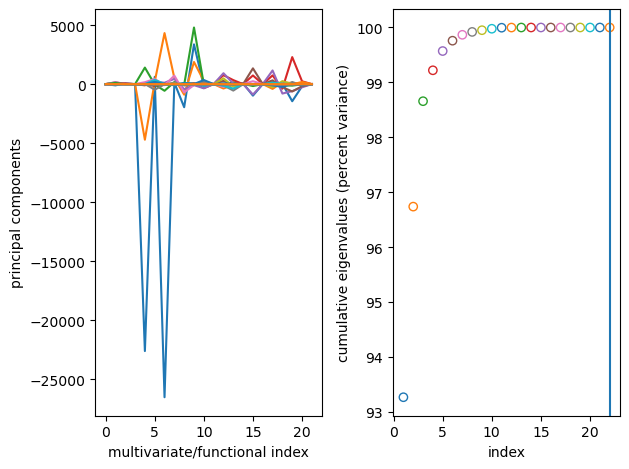

In [39]:
pca = pb.BassPCAsetup(XY)
pca.plot()

In [51]:
mod = pb.bass(X.values,Y.values)

BASS MCMC Complete. Time: 4.006294 seconds.


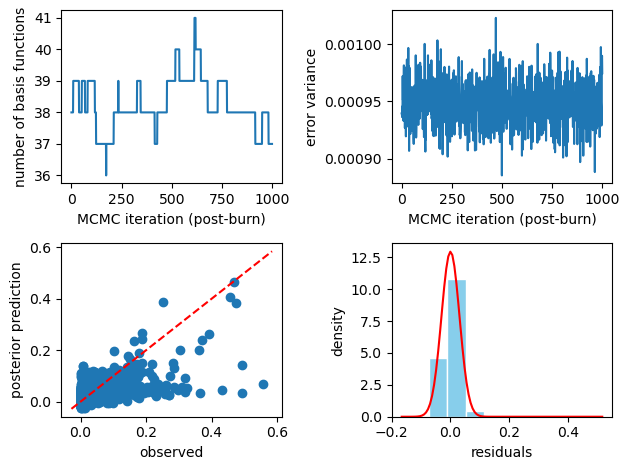

In [52]:
mod.plot()

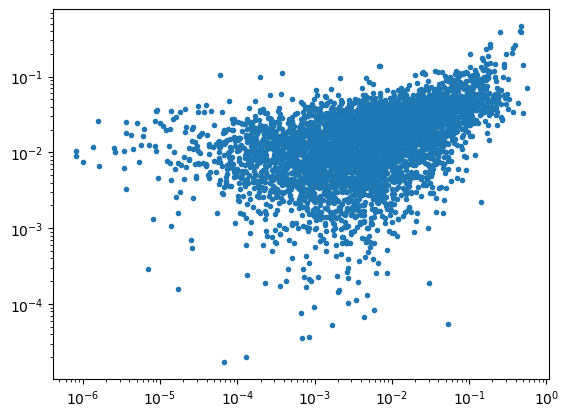

In [60]:
p_pred = mod.predict(X.values)
plt.loglog(Y, p_pred.mean(axis=0), '.')
plt.show()

In [77]:
bm = mod.makeBasisMatrix(5, X.values)

In [75]:
pb.BassBasis(X.values,Y.values,bm, )

TypeError: BassBasis.__init__() missing 5 required positional arguments: 'basis', 'newy', 'y_mean', 'y_sd', and 'trunc_error'

In [81]:
sb = pb.sobolBasis(mod)

In [85]:
sb.plot()

AttributeError: 'sobolBasis' object has no attribute 'xx'

In [88]:
mod

PCA analysis

In [89]:
from sklearn.decomposition import PCA

In [107]:
pca = PCA(3)

In [108]:
X_reduced = pca.fit_transform(X)

In [111]:
%matplotlib

Using matplotlib backend: QtAgg


In [112]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)


ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=np.log10(Y),
)

Decision tree

In [152]:
from sklearn import tree

clf = tree.DecisionTreeRegressor(min_samples_leaf=10)

In [153]:
clf = clf.fit(X_train, np.log10(y_train))

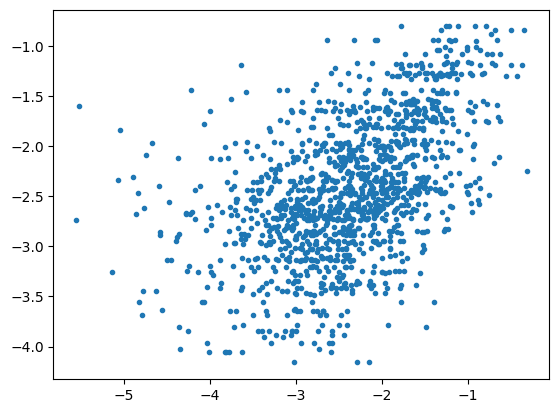

In [154]:
plt.plot(np.log10(y_test), clf.predict(X_test), '.')

In [159]:
clf.score(X_test, y_test)

-3732.4739272332863

In [148]:
for i, feat in enumerate(clf.feature_importances_):
    print(clf.feature_names_in_[i], feat)

huc_carb_i 0.04230937381691871
mean annua 0.11832026772207885
mean diurn 0.035694378332007205
isothermal 0.07861810826418061
annual pre 0.027099747548067103
precipitat 0.058197371253794226
net primar 0.025979442051610874
monthly me 0.031306169333637425
cmi mean 0.052867738824161604
carbonate 0.03051474373708141
clay 0.021399944235957535
density 0.028914173705223246
ksat 0.03372021170142549
organic ma 0.11743361855810173
ph 0.03582619838481417
depth res 0.0462659867574947
rock fragm 0.044073018254485334
sand 0.04143229915326996
silt 0.05369535313424665
depth 0.03424455989679873
water stor 0.04208729533464457


In [134]:
clf.get_metadata_routing()

{'fit': {'sample_weight': None, 'check_input': None}, 'predict': {'check_input': None}, 'score': {'sample_weight': None}}

In [160]:
from sklearn.inspection import permutation_importance

In [163]:
imp = permutation_importance(clf, X_train, y_train, n_repeats=30)

In [165]:
for i, feat in enumerate(clf.feature_importances_):
    print(clf.feature_names_in_[i], feat, imp['importances_mean'][i])

huc_carb_i 0.04667473071717378 -35.283520429802714
mean annua 0.12768267999988048 47.79888524218277
mean diurn 0.027286526937962345 120.00580089702886
isothermal 0.08391313342126254 196.7315994493671
annual pre 0.02324334959035536 -77.4679780407914
precipitat 0.04104806908428006 145.8348558394486
net primar 0.025783170605412825 192.49827365949275
monthly me 0.031907333148370895 29.770699964728344
cmi mean 0.05103709969003678 87.94649415739232
carbonate 0.026713386626355844 75.50241075631448
clay 0.043701235344676195 64.49340612510211
density 0.022192406680811443 14.011515736990441
ksat 0.02969029134463372 34.02408572332876
organic ma 0.12152579834307489 -87.06825555080005
ph 0.03146740015430968 -24.107765452039803
depth res 0.04045327856469785 26.05455599372493
rock fragm 0.04137486281797941 34.03655670786717
sand 0.046742436368962116 68.74316860521527
silt 0.056503634205718474 120.66514727345505
depth 0.03871941322575203 97.15579465386654
water stor 0.042339763128293274 67.87258042685

<ErrorbarContainer object of 3 artists>

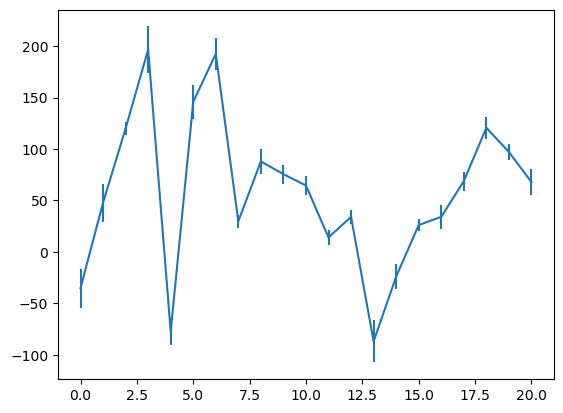

In [168]:
plt.errorbar(np.arange(len(imp['importances_mean'])), imp['importances_mean'], imp['importances_std'])

In [169]:
feature_names = clf.feature_names_in_
forest_importances = pd.Series(imp.importances_mean, index=feature_names)


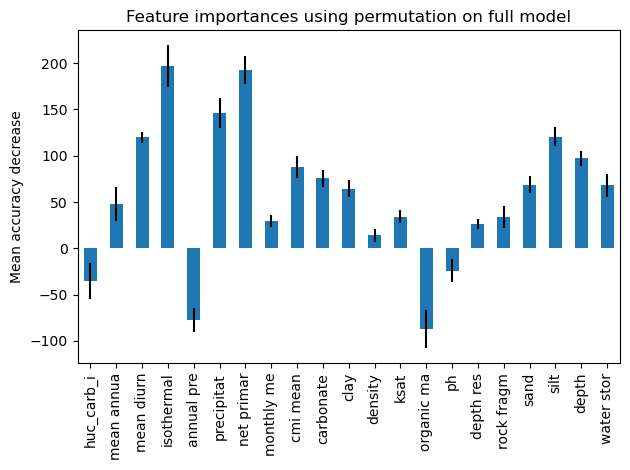

In [171]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=imp.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [180]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [225]:
clf = RandomForestRegressor(max_depth=15, random_state=0)
clf.fit(X_train, y_train) 

RandomForestRegressor(max_depth=15, random_state=0)

In [226]:
from sklearn.inspection import permutation_importance


def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    ax.boxplot(
        result.importances[perm_sorted_idx].T,
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

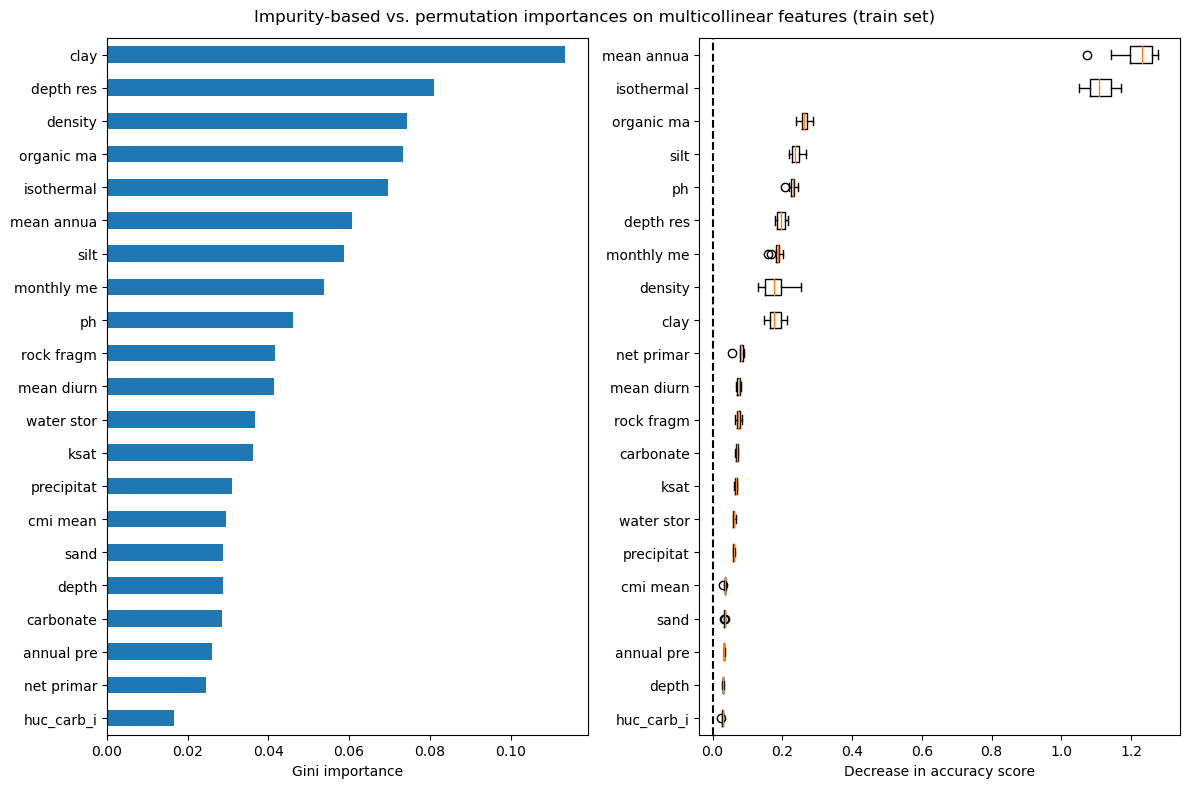

In [227]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mdi_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(clf, X_train, y_train, ax2)
ax2.set_xlabel("Decrease in accuracy score")
fig.suptitle(
    "Impurity-based vs. permutation importances on multicollinear features (train set)"
)
_ = fig.tight_layout()

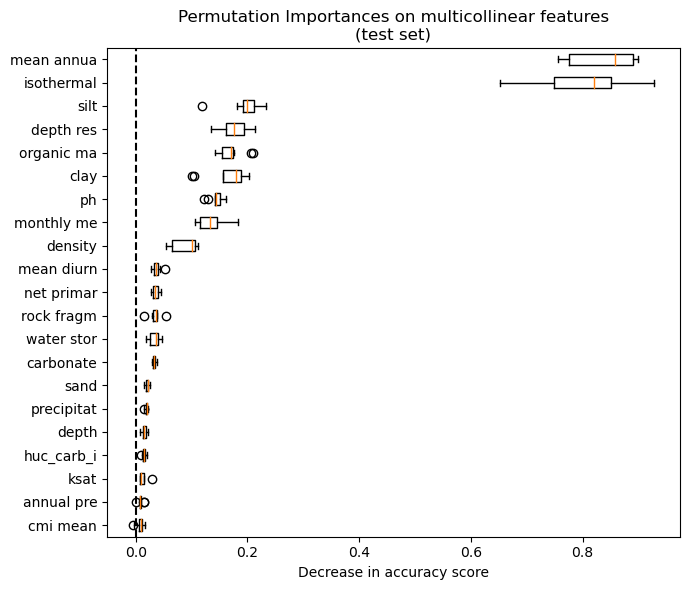

In [178]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_permutation_importance(clf, X_test, y_test, ax)
ax.set_title("Permutation Importances on multicollinear features\n(test set)")
ax.set_xlabel("Decrease in accuracy score")
_ = ax.figure.tight_layout()

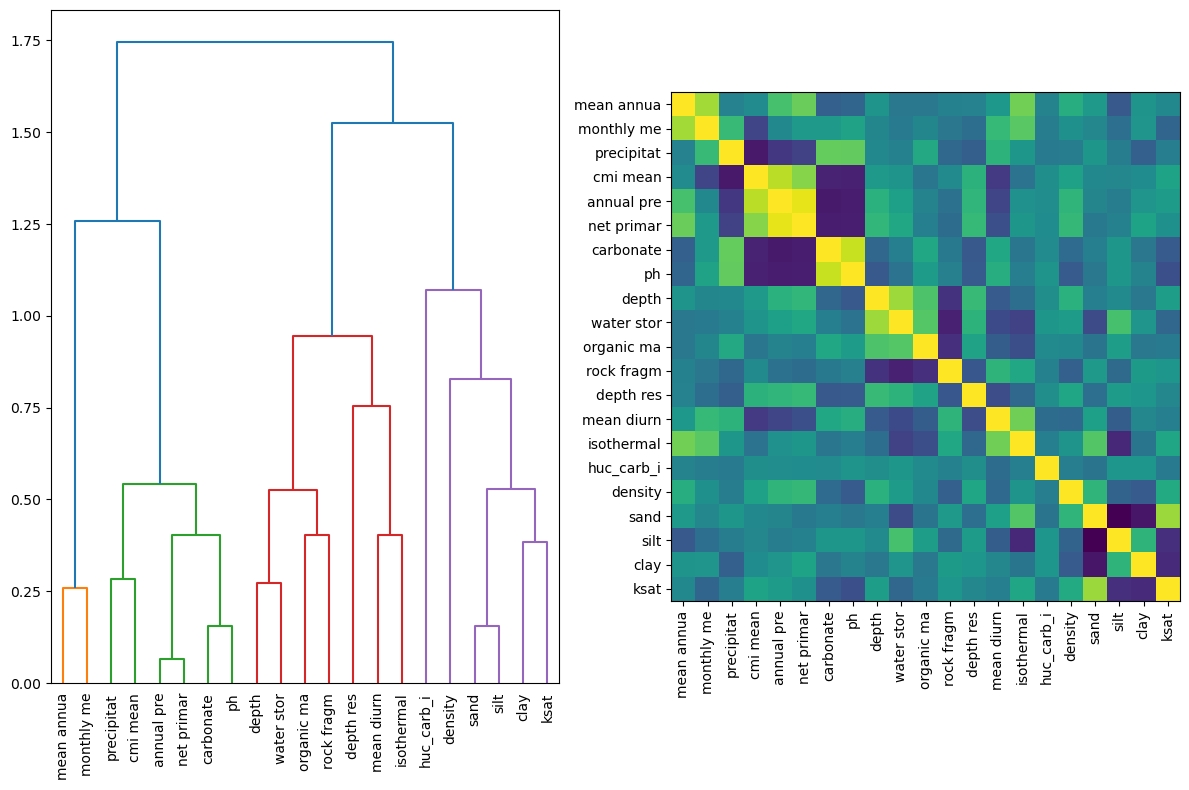

In [179]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.stats import spearmanr

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=X.columns.to_list(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
_ = fig.tight_layout()

In [189]:
from collections import defaultdict

cluster_ids = hierarchy.fcluster(dist_linkage, 0.9, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
selected_features_names = X.columns[selected_features]

X_train_sel = X_train[selected_features_names]
X_test_sel = X_test[selected_features_names]

clf_sel = RandomForestRegressor(n_estimators=100, random_state=42)
clf_sel.fit(X_train_sel, y_train)
print(
    "Baseline accuracy on test data with features removed:"
    f" {clf_sel.score(X_test_sel, y_test):.2}"
)

Baseline accuracy on test data with features removed: 0.3


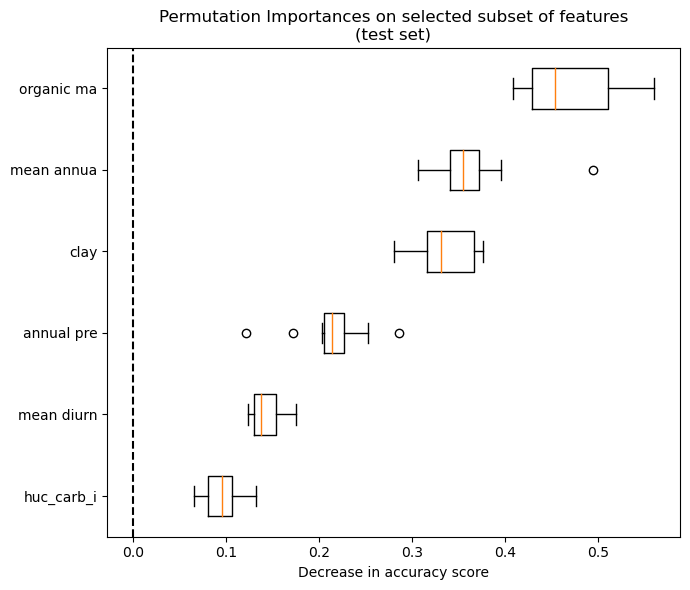

In [190]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_permutation_importance(clf_sel, X_test_sel, y_test, ax)
ax.set_title("Permutation Importances on selected subset of features\n(test set)")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()
plt.show()

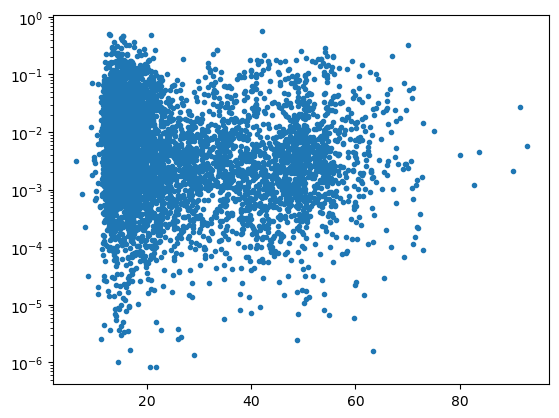

In [186]:
plt.semilogy(X['precipitat'], Y, '.')

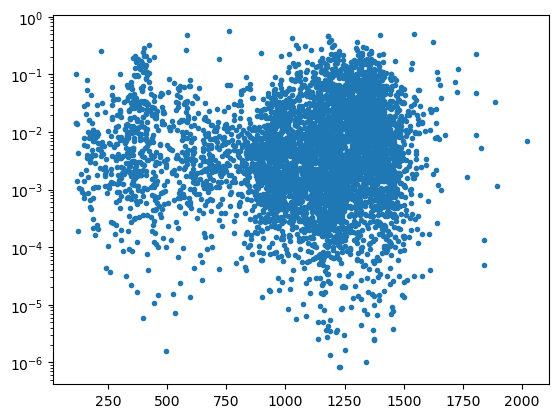

In [187]:
plt.semilogy(X['annual pre'], Y, '.')

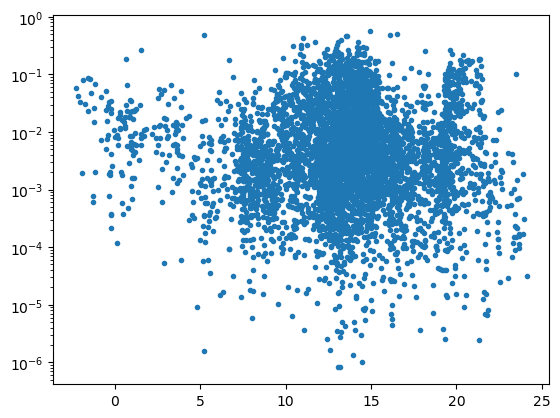

In [188]:
plt.semilogy(X['mean annua'], Y, '.')

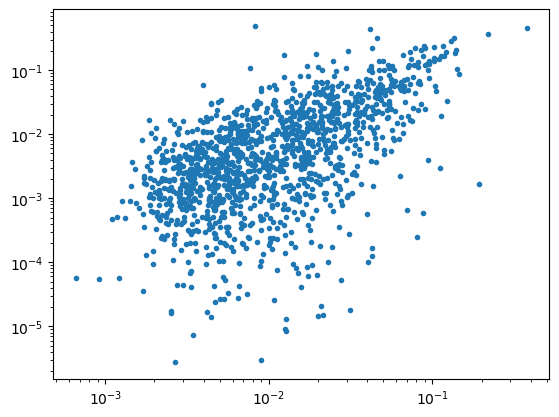

In [281]:
plt.loglog(clf.predict(X_test), y_test, '.')
#plt.xlim([0.4e-5,0.8])

In [200]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit_transform(X_train_sel)

array([[1.00000000e+00, 1.00000000e+00, 1.37062500e+01, ...,
        1.37222105e+03, 3.75689755e+02, 1.02857183e+02],
       [1.00000000e+00, 5.00000000e-01, 1.36635135e+01, ...,
        6.67309456e+02, 4.43265089e+02, 2.94442013e+02],
       [1.00000000e+00, 5.00000000e-01, 1.38278802e+01, ...,
        7.27466642e+02, 2.78535167e+02, 1.06646593e+02],
       ...,
       [1.00000000e+00, 7.20113577e-01, 1.82390244e+01, ...,
        2.03774721e+03, 9.28650370e+02, 4.23208289e+02],
       [1.00000000e+00, 1.00000000e+00, 1.89535242e+01, ...,
        2.27610434e+03, 3.91708770e+02, 6.74115671e+01],
       [1.00000000e+00, 5.00000000e-01, 1.26644231e+01, ...,
        1.19124699e+03, 6.22430487e+02, 3.25221987e+02]])

In [213]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
# fit to an order-3 polynomial data
model = model.fit(X_train_sel, np.log10(y_train))
model.named_steps['linear'].coef_

array([-2.44268167e-01, -5.60209759e-01, -7.16070859e-02, -4.22448630e-01,
       -1.95075605e-03,  1.32869285e-01, -1.70250410e-02, -4.84309327e-01,
        9.69877471e-03,  9.72015390e-03,  9.84794799e-04,  1.93018354e-02,
       -1.08022672e-02, -2.06046298e-04,  5.03889870e-03,  2.18581097e-05,
       -1.49462255e-03,  6.31036744e-04,  2.19065312e-02,  1.31332837e-04,
       -9.98716662e-03,  3.73085218e-03,  5.93146318e-07, -3.40325709e-05,
       -2.78900811e-05,  4.69339007e-04, -1.01136102e-03,  1.10521712e-04])

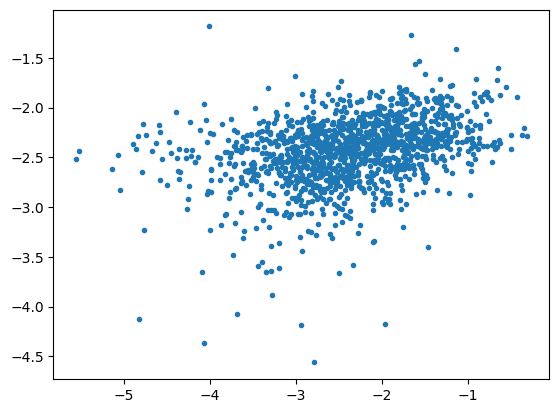

In [214]:
plt.plot(np.log10(y_test), model.predict(X_test_sel), '.')

## SHAP package

In [260]:
# Ran this on random forest regressor
import shap
X1000 = shap.utils.sample(X_train_sel,1000)

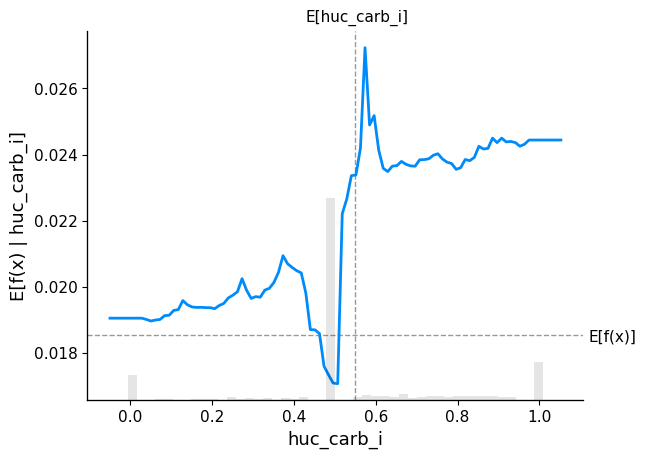

In [261]:
shap.partial_dependence_plot("huc_carb_i", clf_sel.predict,X1000, ice=False, model_expected_value=True, feature_expected_value=True)

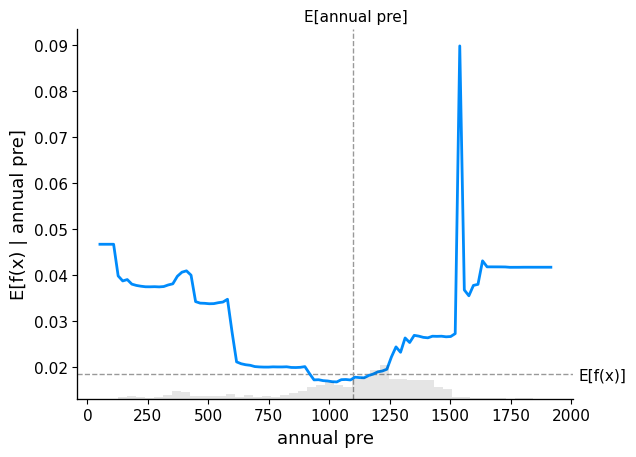

In [262]:
shap.partial_dependence_plot("annual pre", clf_sel.predict,X1000, ice=False, model_expected_value=True, feature_expected_value=True)

In [264]:
explainer = shap.Explainer(clf_sel.predict, X1000)
shap_values = explainer(X_test_sel)


ExactExplainer explainer: 1339it [01:02, 17.96it/s]                          


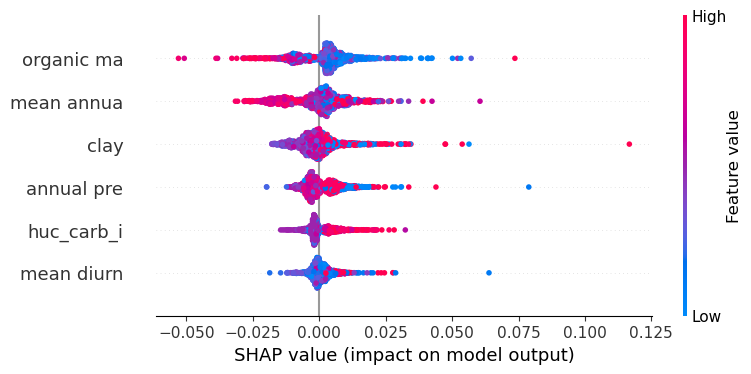

In [265]:
shap.plots.beeswarm(shap_values)

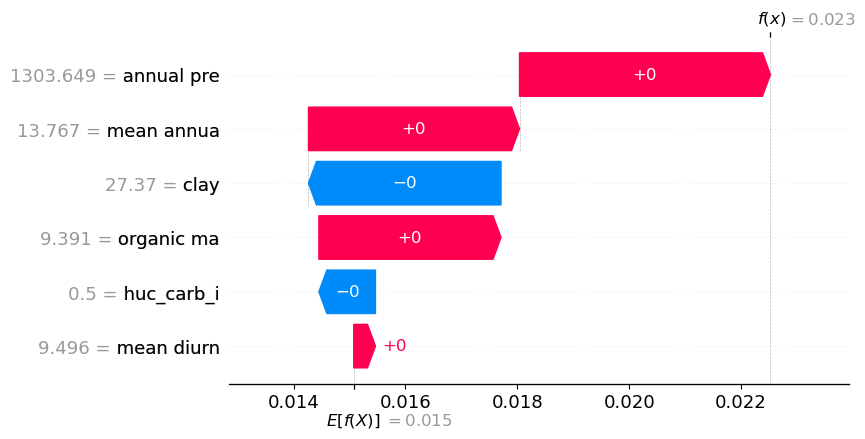

In [267]:
shap.plots.waterfall(shap_values[10])

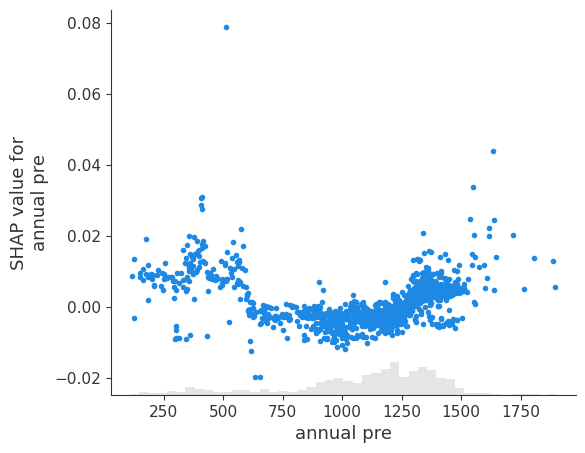

In [268]:
shap.plots.scatter(shap_values[:,"annual pre"])

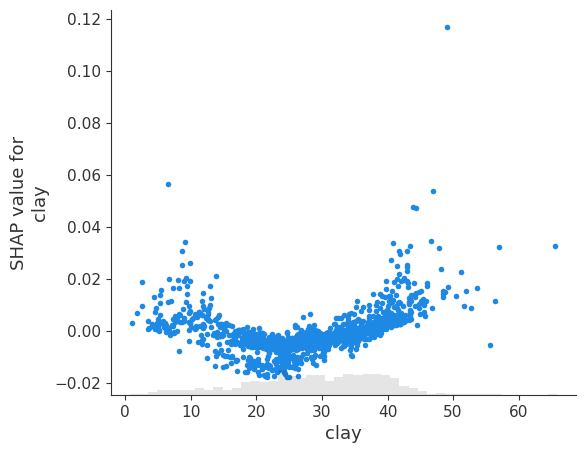

In [271]:
shap.plots.scatter(shap_values[:,"clay"])

/home/mcoving/anaconda3/envs/geo_env/lib/python3.11/site-packages/shap/utils/_clustering.py:126: UserWarning: No/low signal found from feature 0 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
  warnings.warn(f"No/low signal found from feature {i} (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).")
/home/mcoving/anaconda3/envs/geo_env/lib/python3.11/site-packages/shap/utils/_clustering.py:126: UserWarning: No/low signal found from feature 1 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
  warnings.warn(f"No/low signal found from feature {i} (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).")
/home/mcoving/anaconda3/envs

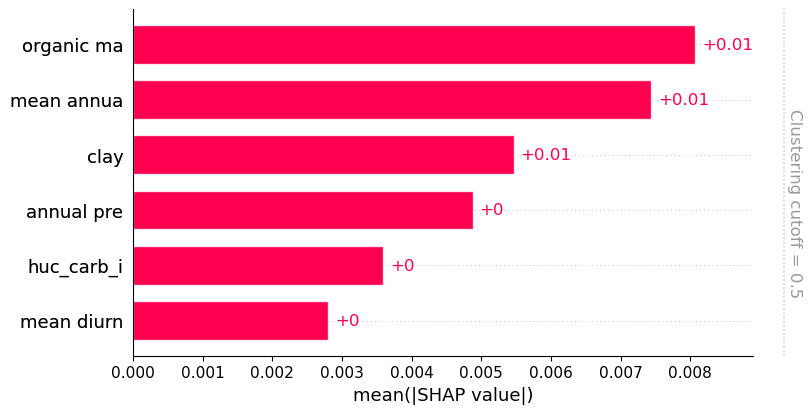

In [275]:
clustering = shap.utils.hclust(X_train_sel, y_train)
shap.plots.bar(shap_values, clustering=clustering)

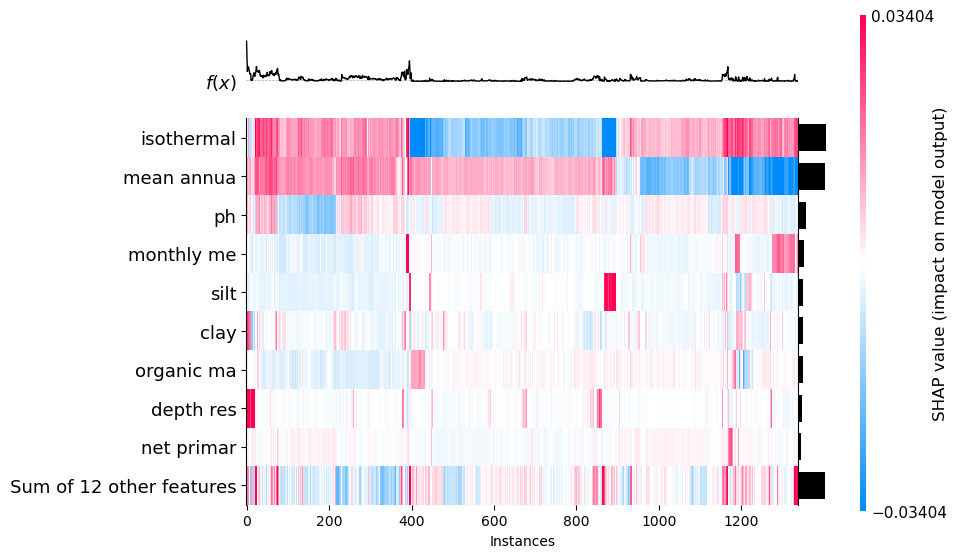

<AxesSubplot: xlabel='Instances'>

In [247]:
shap.plots.heatmap(shap_values)

## EconML

In [249]:
from econml.dr import SparseLinearDRLearner


In [253]:
X.keys()

Index(['huc_carb_i', 'mean annua', 'mean diurn', 'isothermal', 'annual pre',
       'precipitat', 'net primar', 'monthly me', 'cmi mean', 'carbonate',
       'clay', 'density', 'ksat', 'organic ma', 'ph', 'depth res',
       'rock fragm', 'sand', 'silt', 'depth', 'water stor'],
      dtype='object')

In [259]:
est = SparseLinearDRLearner()
est.fit(y_train, X_train["huc_carb_i"], X=X_train[['precipitat', 
       'clay', 'organic ma', 'ph', 'depth res',
       'rock fragm', 'sand', 'silt',]])

/home/mcoving/anaconda3/envs/geo_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


/home/mcoving/anaconda3/envs/geo_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mcoving/anaconda3/envs/geo_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

KeyboardInterrupt: 

In [258]:
X_train[['precipitat',  'clay', 'organic ma', 'ph', 'depth res',
       'rock fragm', 'sand', 'silt']]

precipitat       clay  organic ma        ph   depth res  rock fragm  \
16570   14.017857  37.043502   10.141853  5.288222  100.487980    0.054251   
25510   21.472973  25.832334   17.159313  6.261146   66.946595    0.007582   
6352    16.382949  26.971590   10.326984  5.186569   88.915708    0.027608   
6706    13.744848  42.284292    8.058348  6.023581   81.554812    0.096532   
25324   13.987218  37.917264   11.069752  5.801315   78.546202    0.048289   
...           ...        ...         ...       ...         ...         ...   
15472   37.429070  13.530535    2.828249  7.855194   48.225818    0.316794   
18444   16.078431  25.863344   13.070834  5.492273  107.248297    0.099776   
27764   33.699593  45.141413   20.572027  7.926697   67.512066    0.211503   
28274   34.611454  47.708535    8.210455  7.206428   48.135579    0.417997   
4041    48.054808  34.514446   18.033912  6.811458   50.275871    0.025507   

            sand       silt  
16570  16.889645  46.066854  
25510   9.009003  65.158664  
6352   19.978586  53.049824  
6706   17.833684  39.882024  
25324  15.242272  46.840464  
...          ...        ...  
15472  65.955179  20.514286  
18444  26.540065  47.596590  
27764  20.123530  34.735057  
28274  22.424476  29.869344  
4041   13.110802  52.375410  

[4013 rows x 8 columns]

### Support Vector Regression

In [198]:
from sklearn import svm
regr = svm.SVR()
regr.fit(X_train, np.log10(y_train))

SVR()

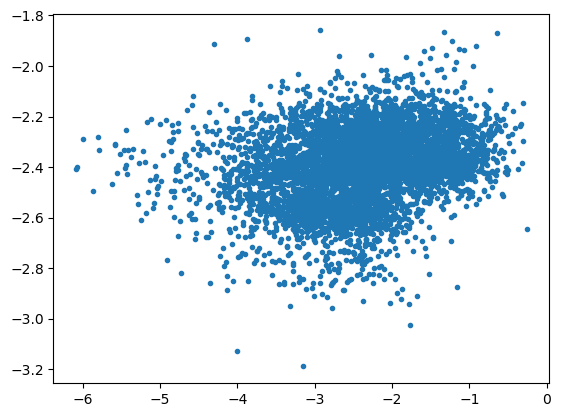

In [199]:
plt.plot(np.log10(Y), regr.predict(X), '.')